<a href="https://colab.research.google.com/github/bhatiap70077/Natural-Language-Processing/blob/main/Week_6_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import nltk 
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data  = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label", "document"], header=None)
data.head()

,label,document
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Pre-Processing

In [7]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
data['document'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   document  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.describe

<bound method NDFrame.describe of      label                                           document
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [11]:
data[['label']]

,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [12]:
data[['document']]

,document
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [13]:
data.count()

label       5572
document    5572
dtype: int64

In [14]:
data.isnull().sum()

label       0
document    0
dtype: int64

In [15]:
data.isna().sum()

label       0
document    0
dtype: int64

## Model Split

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, stratify=data['label'], random_state= 1234)

In [17]:
train

,label,document
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
824,spam,25p 4 alfie Moon's Children in need song on ur...
1406,ham,K..k..any special today?
3220,ham,Me too baby! I promise to treat you well! I be...
4325,ham,I am not having her number sir
...,...,...
3337,ham,Then u go back urself lor...
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...
4722,ham,"Yup. Anything lor, if u dun wan it's ok..."
3471,ham,aathi..where are you dear..


In [18]:
training_data_clean = (
    # start with training data
    train
    # convert to lower case
    .assign(clean_document= lambda x:[text.lower() for text in x.document]) 
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # remove leading & trainling spaces 
    .assign(clean_document = lambda x: [text.strip() for text in x.clean_document])
    # remove all the '\n' values with space
    .assign(clean_document= lambda x: [re.sub(r"\n","",text) for text in x.clean_document] )
    # word tokenize
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
   # Lemmatising the words
    .assign(word_token= lambda x: [[WordNetLemmatizer().lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
     # input to sklearn
    #  # input to sklearn
    # .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])
)

In [19]:
training_data_clean

,label,document,clean_document,word_token
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1000s flirting now txt girl or bloke ur name ...,"[chatting, ur, eg, girl, flirting, zoe, name, ..."
824,spam,25p 4 alfie Moon's Children in need song on ur...,25p 4 alfie moons children in need song on ur ...,"[tell, 25p, poly, song, profit, child, 0870141..."
1406,ham,K..k..any special today?,kkany special today,"[kkany, today, special]"
3220,ham,Me too baby! I promise to treat you well! I be...,me too baby i promise to treat you well i bet ...,"[baby, bet, care, well, good, treat, take, pro..."
4325,ham,I am not having her number sir,i am not having her number sir,"[number, sir]"
...,...,...,...,...
3337,ham,Then u go back urself lor...,then u go back urself lor,"[back, lor, u, go, urself]"
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...,freemsg hi baby wow just got a new cam moby wa...,"[baby, hot, wow, freemsg, pic, w8in, hi, 4utxt..."
4722,ham,"Yup. Anything lor, if u dun wan it's ok...",yup anything lor if u dun wan its ok,"[dun, yup, wan, ok, lor, anything, u]"
3471,ham,aathi..where are you dear..,aathiwhere are you dear,"[dear, aathiwhere]"


In [20]:
train


,label,document
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
824,spam,25p 4 alfie Moon's Children in need song on ur...
1406,ham,K..k..any special today?
3220,ham,Me too baby! I promise to treat you well! I be...
4325,ham,I am not having her number sir
...,...,...
3337,ham,Then u go back urself lor...
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...
4722,ham,"Yup. Anything lor, if u dun wan it's ok..."
3471,ham,aathi..where are you dear..


In [21]:
d=[]
for i in training_data_clean['word_token']:
    for j in i:
        d.append(i)

In [22]:
#Combined List
d

[['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke',
  'get',
  'join',
  '8007',
  '18',
  'age'],
 ['chatting',
  'ur',
  'eg',
  'girl',
  'flirting',
  'zoe',
  'name',
  '1000',
  'txt',
  'bloke

In [23]:
#To flatten the list
flattened = []
for sublist in d:
    for val in sublist:
        flattened.append(val)

In [24]:
#list of combined dcoument column values
flattened

['chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'name',
 '1000',
 'txt',
 'bloke',
 'get',
 'join',
 '8007',
 '18',
 'age',
 'chatting',
 'ur',
 'eg',
 'girl',
 'flirting',
 'zoe',
 'nam

In [25]:
#List of unique values 
values = flattened


def get_unique_values(values):
    unique = []

    for value in values:
        if value in unique:
            continue
        else:
            unique.append(value)
    return unique


print(get_unique_values(values))

['chatting', 'ur', 'eg', 'girl', 'flirting', 'zoe', 'name', '1000', 'txt', 'bloke', 'get', 'join', '8007', '18', 'age', 'tell', '25p', 'poly', 'song', 'profit', 'child', '08701417012', 'mob', 'need', 'charity', 'tone', 'm8s', '4', 'moon', 'nokias', 'alfie', 'zed', '2', 'polys', 'kkany', 'today', 'special', 'baby', 'bet', 'care', 'well', 'good', 'treat', 'take', 'promise', 'number', 'sir', 'exhibition', 'wan', 'say', 'go', 'glass', 'watch', 'bian', 'shun', 'mum', 'da', 'hospital', 'return', 'evening', 'home', 'hand', 'spatula', 'dont', 'think', '261104', 'expires', 'private', '2003', 'code', 'identifier', 'call', 'unredeemed', 'show', 'point', 'account', 'statement', '800', '08718738001', 'sim', '49557', 'mobile', 'marvel', '8ball', 'play', '83338', 'game', 'u', 'text', 'right', 'spider', 'send', 'ultimate', '450', 'wallpaper', 'official', 'free', 'spiderman', 'pay', 'gon', 'ya', 'ticket', 'nice', 'na', 'know', 'waitshould', 'texting', 'im', 'cash', 'speak', 'live', 'award', 'selected',

In [26]:
# we can use chain and unpack method
import itertools
# get all the lists in one giant list
all_words = list(itertools.chain(*training_data_clean.word_token))
#get unique qords
vocabulary = list(set(all_words))

In [27]:
# get frequency table
len(vocabulary)

7232

In [28]:
from collections import Counter
word_counts = Counter(all_words)

In [29]:
#Common values
word_counts.most_common(5)

[('u', 595), ('call', 388), ('im', 317), ('get', 268), ('2', 268)]

In [30]:
#Last 5 values
least_common = word_counts.most_common()[-5:]
least_common

[('named', 1), ('prix', 1), ('w8in', 1), ('4utxt', 1), ('chatim', 1)]

In [31]:
word_counts
# convert to dataframe
wc={'word':word_counts.keys(),'count':word_counts.values()}
df2=pd.DataFrame(wc)
df2.head()
df2

,word,count
0,chatting,3
1,ur,219
2,eg,9
3,girl,33
4,flirting,2
...,...,...
7227,named,1
7228,prix,1
7229,w8in,1
7230,4utxt,1


## Vectorizing Data: Bag-Of-Words

In [32]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform([i for i in training_data_clean['document']])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn['label'] = training_data_clean['label']
df_bow_sklearn

,all,and,are,at,be,but,call,can,do,for,free,from,get,go,gt,have,how,if,in,is,it,just,know,like,ll,lt,me,my,no,not,now,of,ok,on,or,out,so,that,the,this,to,up,ur,we,what,when,will,with,you,your,label
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,ham
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,spam
3896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,ham
3897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,spam
3898,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,ham


## Shows Wordcloud

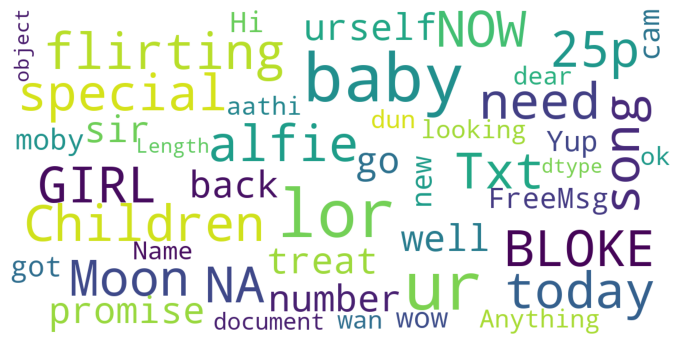

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(training_data_clean['document'])
# show_wordcloud(Samsung_Reviews_positive['Reviews'])

## Feature Engineering: Feature Creation

In [35]:
import pandas as pd

data  = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label", "document"], header=None)
data.columns = ['label', 'document']

### Create feature for text message length and % of punctuation in text 

In [36]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['document'].apply(lambda x: len(x) - x.count(" "))

data.head()


,label,document,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


### Split into train/test

In [37]:
from sklearn.model_selection import train_test_split

X=data[['document']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
!pip install pycaret

In [39]:
from pycaret.classification import *

In [40]:
s = setup(data = df_bow_sklearn, target='label',
          numeric_features=vectorizer.get_feature_names(),
          session_id=123,verbose=False,silent=True)

In [41]:
m = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4948,0.4671,0.4000,0.1087,0.1709,-0.0425,-0.0613
1,0.5000,0.4566,0.4000,0.1099,0.1724,-0.0401,-0.0573
2,0.4688,0.3723,0.3600,0.0947,0.1500,-0.0707,-0.1043
3,0.4844,0.4804,0.5200,0.1300,0.2080,-0.0004,-0.0006
4,0.5521,0.4281,0.2800,0.0933,0.1400,-0.0687,-0.0877
5,0.5156,0.5521,0.6154,0.1616,0.2560,0.0528,0.0790
6,0.4479,0.3881,0.3077,0.0833,0.1311,-0.1042,-0.1522
7,0.4375,0.3442,0.2692,0.0729,0.1148,-0.1250,-0.1827
8,0.5260,0.4720,0.3462,0.1084,0.1651,-0.0518,-0.0688
9,0.5026,0.5190,0.4400,0.1196,0.1880,-0.0224,-0.0324


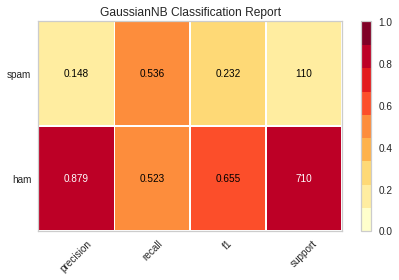

In [42]:
plot_model(m,'class_report')

In [43]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label", "document"], header=None)

In [45]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
df.head()

,label,document
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
#pycaret
from pycaret.classification import *

In [48]:
exp_clf = setup(df, target = 'label', silent = True)

,Description,Value
0,session_id,1784
1,Target,label
2,Target Type,Binary
3,Label Encoded,"ham: 0, spam: 1"
4,Original Data,"(5572, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [49]:
clf = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2026,0.5399,1.0,0.1433,0.2506,0.0226,0.1070
1,0.1872,0.5297,1.0,0.1432,0.2506,0.0169,0.0922
2,0.2128,0.5445,1.0,0.1472,0.2567,0.0259,0.1145
3,0.2051,0.5401,1.0,0.1460,0.2548,0.0231,0.1082
4,0.1872,0.5297,1.0,0.1432,0.2506,0.0169,0.0922
5,0.1897,0.5312,1.0,0.1436,0.2512,0.0177,0.0946
6,0.1974,0.5356,1.0,0.1448,0.2530,0.0204,0.1016
7,0.1897,0.5312,1.0,0.1436,0.2512,0.0177,0.0946
8,0.2000,0.5371,1.0,0.1452,0.2536,0.0213,0.1038
9,0.2179,0.5475,1.0,0.1480,0.2579,0.0277,0.1186


In [50]:
tuned_clf = tune_model(clf, n_iter =5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2026,0.5399,1.0,0.1433,0.2506,0.0226,0.1070
1,0.1872,0.5297,1.0,0.1432,0.2506,0.0169,0.0922
2,0.2128,0.5445,1.0,0.1472,0.2567,0.0259,0.1145
3,0.2051,0.5401,1.0,0.1460,0.2548,0.0231,0.1082
4,0.1872,0.5297,1.0,0.1432,0.2506,0.0169,0.0922
5,0.1897,0.5312,1.0,0.1436,0.2512,0.0177,0.0946
6,0.1974,0.5356,1.0,0.1448,0.2530,0.0204,0.1016
7,0.1897,0.5312,1.0,0.1436,0.2512,0.0177,0.0946
8,0.2000,0.5371,1.0,0.1452,0.2536,0.0213,0.1038
9,0.2179,0.5475,1.0,0.1480,0.2579,0.0277,0.1186


## Using sklearn 

In [79]:
import pandas as pd

# reading the training data
docs = pd.read_table('SMSSpamCollection.txt', header=None, names=['Class', 'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
# number of SMSes / documents
len(docs)

5572

In [81]:
# counting spam and ham instances
ham_spam = docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [82]:
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13%


In [83]:
# mapping labels to 0 and 1
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [84]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [85]:
# we can now drop the column 'Class'
docs = docs.drop('Class', axis=1)
docs.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [86]:
# convert to X and y
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [87]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [88]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [89]:
y_train.head()

710     1
3740    0
2711    1
3155    1
3748    0
Name: label, dtype: int64

In [90]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [91]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [92]:
# printing the vocabulary
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [93]:
# vocab size
len(vect.vocabulary_.keys())

7204

In [94]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [95]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [96]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [97]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [99]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[1201,    7],
       [  10,  175]])

In [100]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1201    7]
 [  10  175]]


In [101]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9459459459459459


In [102]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9942052980132451


In [103]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9615384615384616
0.9615384615384616


In [104]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [105]:
from sklearn.metrics import classification_report

In [106]:
report = classification_report(y_test, y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393

